### Predição de cancer de mama
Usando o dataset (https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) 
Prof. Vandeir aniceto

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#carregando o dataset
df=pd.read_csv('breast_cancer.csv')

# Explorar

In [ ]:
#visualizando colunas
df.head()

In [ ]:
#removendo colunas irrelevantes 
df.drop(columns='id', inplace=True)
df.drop(columns='Unnamed: 32', inplace=True)

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
b = df.loc[df['diagnosis'] == 'B']
m = df.loc[df['diagnosis'] == 'M']

sns.distplot(b[['radius_mean']], hist=False, rug=True, label="B")
sns.distplot(m[['radius_mean']], hist=False, rug=True, label="M")


In [ ]:
sns.distplot(b[['area_mean']], hist=False, rug=True, label="B")
sns.distplot(m[['area_mean']], hist=False, rug=True, label="M")


In [ ]:
sns.distplot(b[['concavity_worst']], hist=False, rug=True, label="B")
sns.distplot(m[['concavity_worst']], hist=False, rug=True, label="M")


### Uso do plotly

In [ ]:

import plotly.express as px


In [ ]:
import plotly.express as px
fig = px.histogram(df, x="fractal_dimension_worst")
fig.show()


In [ ]:
fig = px.histogram(df, x="fractal_dimension_worst", color="diagnosis")
fig.show()


In [ ]:
fig = px.histogram(df, x="fractal_dimension_worst", color="diagnosis")
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.80)
fig.show()



In [ ]:
for col in df.columns: 
    if df[col].dtype=="float64":
        fig = px.histogram(df, x=col, color="diagnosis")
        fig.update_layout(barmode='overlay')
        fig.update_traces(opacity=0.80)
        fig.show()


# Treino
## Split para treino. (inicio para o treinamento)
* Divisão dos dados para o treino e teste 
Objetivo separar os dados do dataset para treino e para teste

In [3]:
# Separo em colunas de variaveis e coluna do resultado
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
X=df[[ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

In [5]:
y=df[['diagnosis']]

In [6]:
# Separar dados de treino e dados para teste. (variavel X esta em Maiusculo)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [7]:
X_train[0:1]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
178,13.01,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,0.1395,0.05234,...,14.0,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843


In [8]:
y_train[0:1]

,diagnosis
178,B


### FIT treino efetivo

In [9]:
from sklearn.svm import SVC
#modelo matematico usado para predição.
cancer = LogisticRegression()


In [12]:
cancer.fit(X_train,y_train)

C:\Users\vand3\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vand3\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
#Agora nossa super variavel cance é capaz de prever!!! 
pred = cancer.predict(X_test)

In [18]:
y_test[0:1]

,diagnosis
107,B
437,B
195,B
141,M
319,B
...,...
420,B
279,B
390,B
91,M


In [15]:
pred[0:1]

array(['B'], dtype=object)

### Avaliando  o modelo

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(confusion_matrix(y_test,pred))

[[102   3]
 [  8  58]]


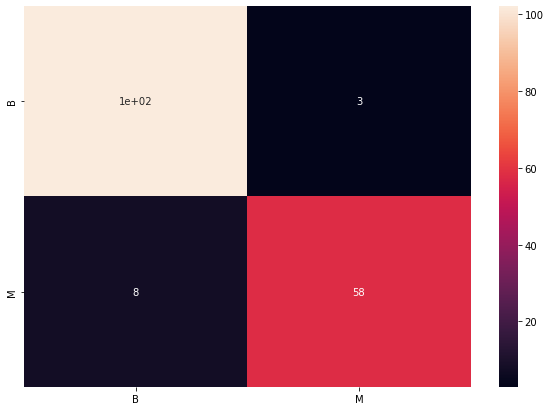

In [19]:
m=confusion_matrix(y_test,pred,y_test.diagnosis.unique())
dfm = pd.DataFrame(m, index = [i for i in y_test.diagnosis.unique()
],
                  columns = [i for i in y_test.diagnosis.unique()])
plt.figure(figsize = (10,7))
sns.heatmap(dfm, annot=True)

In [21]:
#F1 ... SCCORE ... RMSE
print(classification_report(y_test,pred,y_test.diagnosis.unique()))

              precision    recall  f1-score   support

           B       0.93      0.97      0.95       105
           M       0.95      0.88      0.91        66

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

